<a href="https://colab.research.google.com/github/rutvipatel17/blank-app/blob/main/Telecom_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load the dataset**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/content/Telecom Churn.csv')
print(df)
print(df.shape)
df.head()
df.info()
df.describe()
df['churn'].value_counts(normalize=True)

     state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes                     25              

,proportion
churn,
False,0.855086
True,0.144914


In [5]:
df.drop(['phone number'],axis=1,inplace=True)


In [6]:
# Show missing values
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
print(missing)
print(missing_percent)


state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64
state                     0.0
account length            0.0
area code                 0.0
international plan        0.0
voice mail plan           0.0
number vmail messages     0.0
total day minutes         0.0
total day calls           0.0
total day charge          0.0
total eve minutes         0.0
total eve calls           0.0
total eve charge          0.0
total night minutes       0.0
total night calls         0.0
total n

In [7]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.3 MB/s eta 0:00:00


In [8]:
df = pd.read_csv('/content/Telecom Churn.csv')

# Binary encoding
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})

# One-hot encode area code
df = pd.get_dummies(df, columns=['area code'], drop_first=True)

# Target encoding for state
from category_encoders import TargetEncoder

te = TargetEncoder()
df['state'] = te.fit_transform(df['state'], df['churn'])

display(df.head())

,state,account length,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area code_415,area code_510
0,0.185441,128,382-4657,0,1,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,False,True,False
1,0.128256,107,371-7191,0,1,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,False,True,False
2,0.263728,137,358-1921,0,0,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,False,True,False
3,0.128256,84,375-9999,1,0,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,False,False,False
4,0.147498,75,330-6626,1,0,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,False,True,False


In [11]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

for col in ['account length', 'total day minutes', 'customer service calls']:
    cap_outliers(df, col)


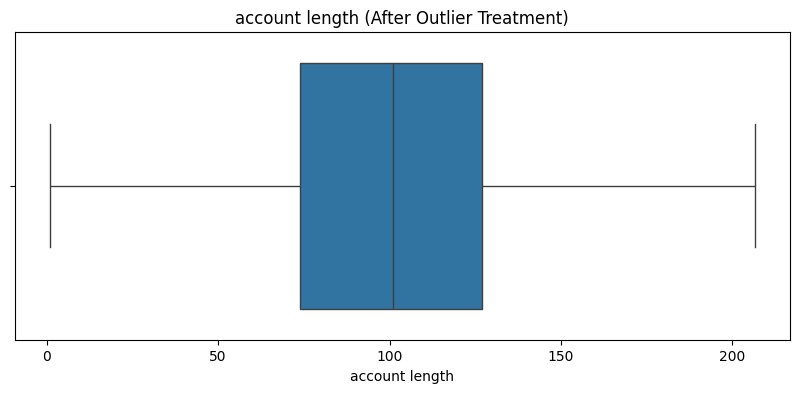

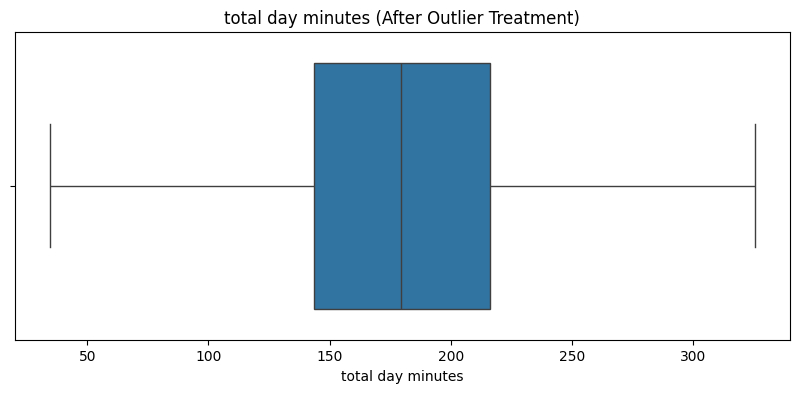

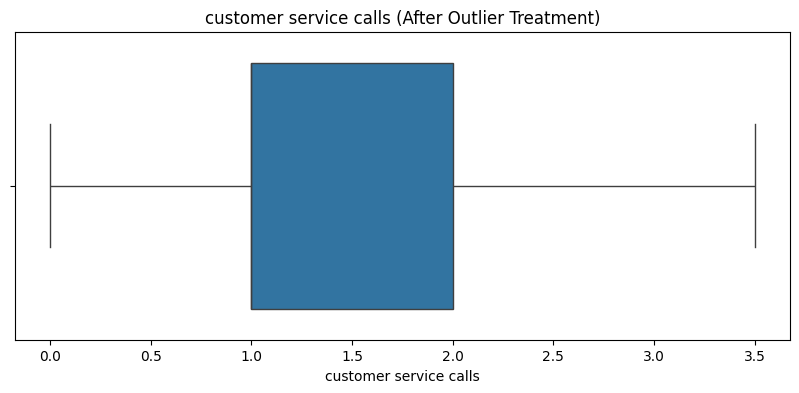

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['account length', 'total day minutes', 'customer service calls']:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f"{col} (After Outlier Treatment)")
    plt.show()


In [13]:
def cap_outliers_percentile(df, column, upper_percentile=0.99):
    upper_limit = df[column].quantile(upper_percentile)
    df[column] = df[column].clip(upper=upper_limit)
    print(f"{column}: Capped at {upper_percentile*100}th percentile.")

for col in ['account length', 'total day minutes', 'customer service calls']:
    cap_outliers_percentile(df, col)


account length: Capped at 99.0th percentile.
total day minutes: Capped at 99.0th percentile.
customer service calls: Capped at 99.0th percentile.


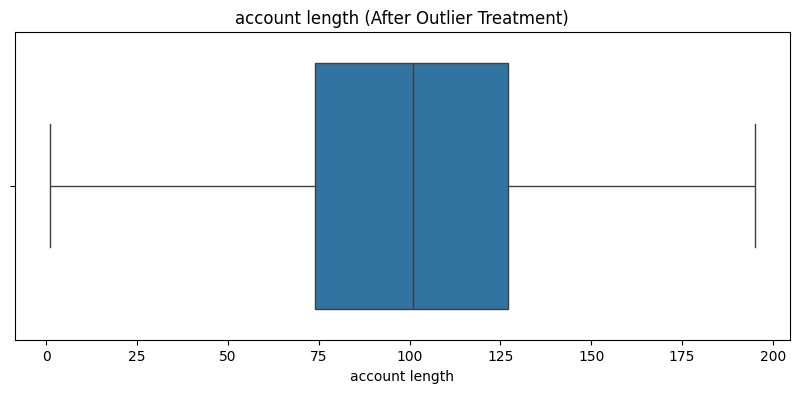

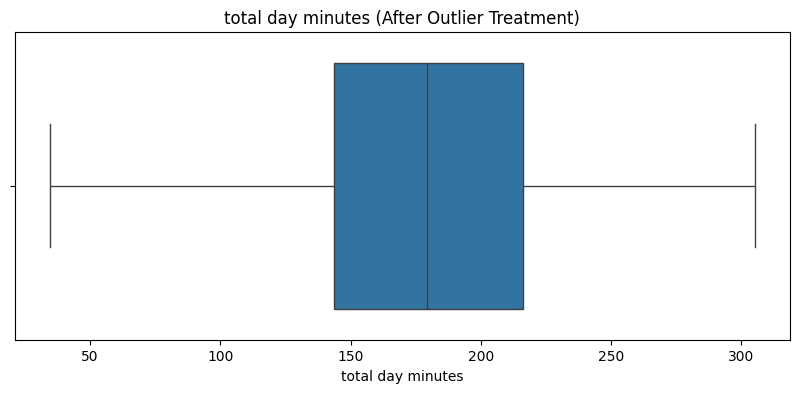

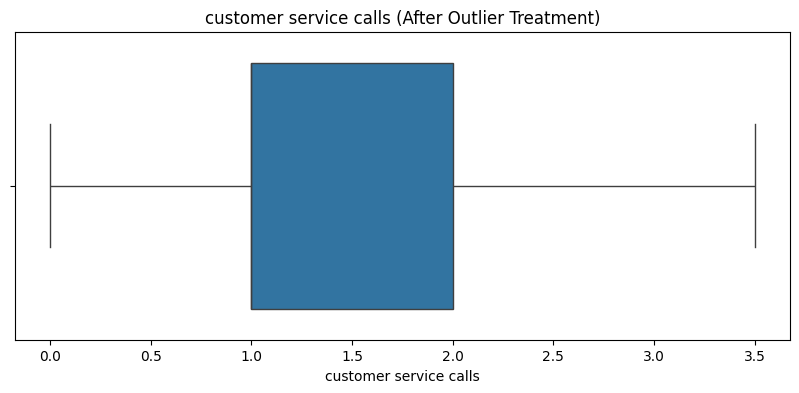

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['account length', 'total day minutes', 'customer service calls']:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f"{col} (After Outlier Treatment)")
    plt.show()


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

X_temp = df.drop(columns=['churn', 'phone number'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_temp)

vif = pd.DataFrame()
vif['feature'] = X_temp.columns
vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

X_temp = X_temp.drop(columns=['total eve charge', 'total eve minutes', 'total night charge', 'total night minutes', 'total intl charge', 'total intl minutes', 'total day charge'])

X_scaled = scaler.fit_transform(X_temp)
vif = pd.DataFrame()
vif['feature'] = X_temp.columns
vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print(vif.sort_values(by='VIF', ascending=False))

                   feature        VIF
3          voice mail plan  11.894569
4    number vmail messages  11.891381
12           area code_510   1.504960
11           area code_415   1.502756
2       international plan   1.007051
5        total day minutes   1.006190
10  customer service calls   1.004406
1           account length   1.004283
0                    state   1.004057
8        total night calls   1.003542
9         total intl calls   1.003090
6          total day calls   1.002600
7          total eve calls   1.001546


In [16]:
df['total_minutes'] = df[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']].sum(axis=1)

df['avg_day_call_duration'] = df['total day minutes'] / df['total day calls'].replace(0, 1)
df['service_intensity'] = df['customer service calls'] / df['account length'].replace(0, 1)
df['intl_usage_ratio'] = df['total intl minutes'] / df['total_minutes'].replace(0, 1)

# Bin account length
df['account_length_bin'] = pd.cut(df['account length'],
                                   bins=[0, 12, 36, df['account length'].max()],
                                   labels=['<12 months', '12-36 months', '>36 months'])
df = pd.get_dummies(df, columns=['account_length_bin'], drop_first=True)
print(df)

         state  account length phone number  international plan  \
0     0.185441           128.0     382-4657                   0   
1     0.128256           107.0     371-7191                   0   
2     0.263728           137.0     358-1921                   0   
3     0.128256            84.0     375-9999                   1   
4     0.147498            75.0     330-6626                   1   
...        ...             ...          ...                 ...   
3328  0.063500           192.0     414-4276                   0   
3329  0.094349            68.0     370-3271                   0   
3330  0.092886            28.0     328-8230                   0   
3331  0.162085           184.0     364-6381                   1   
3332  0.096139            74.0     400-4344                   0   

      voice mail plan  number vmail messages  total day minutes  \
0                   1                     25              265.1   
1                   1                     26              161

In [17]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

X = df.drop(columns=['churn', 'phone number'])
y = df['churn'].astype(int)

selector = SelectKBest(mutual_info_classif, k=12)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Top 12 features:", selected_features.tolist())

X = df[selected_features]

Top 12 features: ['international plan', 'number vmail messages', 'total day minutes', 'total day charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'total_minutes', 'avg_day_call_duration', 'service_intensity', 'account_length_bin_>36 months']


In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [19]:
from sklearn.model_selection import train_test_split
X_resampled = X_resampled.loc[:,~X_resampled.columns.duplicated()]

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingClassifier()
lgbm = LGBMClassifier()

params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

X_resampled = X_resampled.loc[:,~X_resampled.columns.duplicated()]

search = RandomizedSearchCV(lgbm, param_distributions=params, scoring='f1', cv=3, n_iter=10, random_state=42)
search.fit(X_train, y_train)
best_model = search.best_estimator_


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1530, number of negative: 1510
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2107
[LightGBM] [Info] Number of data points in the train set: 3040, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503289 -> initscore=0.013158
[LightGBM] [Info] Start training from score 0.013158
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [21]:
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.97      0.98      0.97       585
           1       0.97      0.97      0.97       555

    accuracy                           0.97      1140
   macro avg       0.97      0.97      0.97      1140
weighted avg       0.97      0.97      0.97      1140

AUC-ROC: 0.9934057134057135


In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cluster_features = df[['total_minutes', 'customer service calls', 'account length', 'intl_usage_ratio']]
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_features)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(cluster_scaled)

df['cluster'] = clusters
print("Silhouette Score:", silhouette_score(cluster_scaled, clusters))

print(df.groupby('cluster')['churn'].mean())


Silhouette Score: 0.20492940831404913
cluster
0    0.166473
1    0.202654
2    0.083840
3    0.125304
Name: churn, dtype: float64


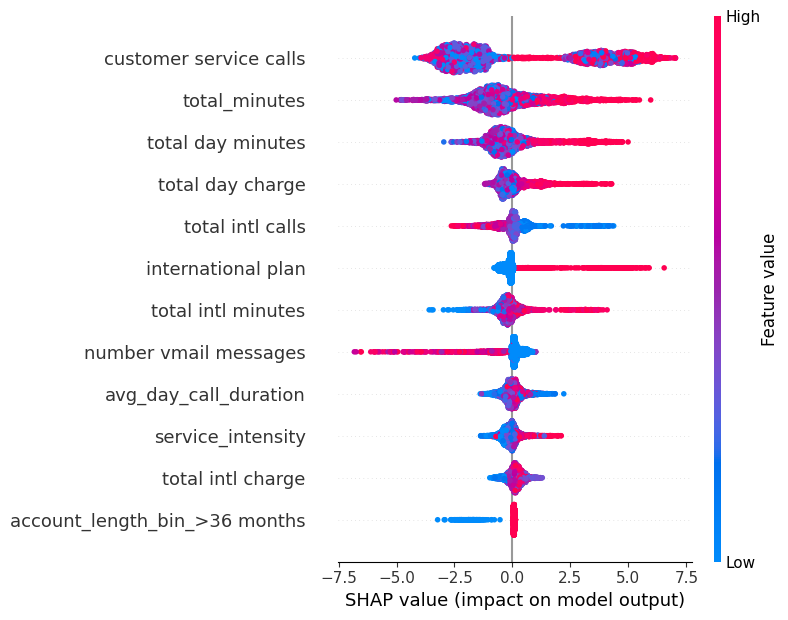

In [23]:
import shap

explainer = shap.Explainer(best_model)
shap_values = explainer(X_train)

shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

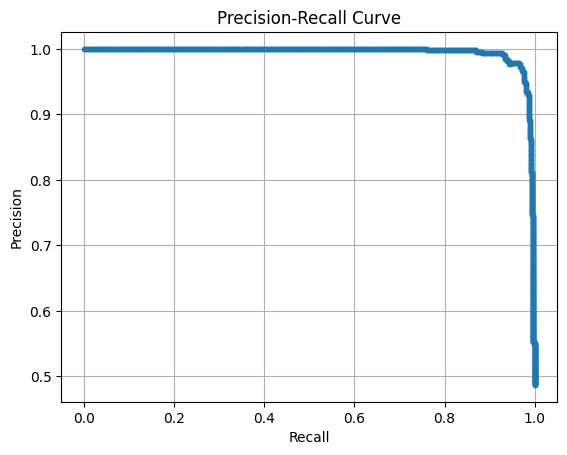

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()


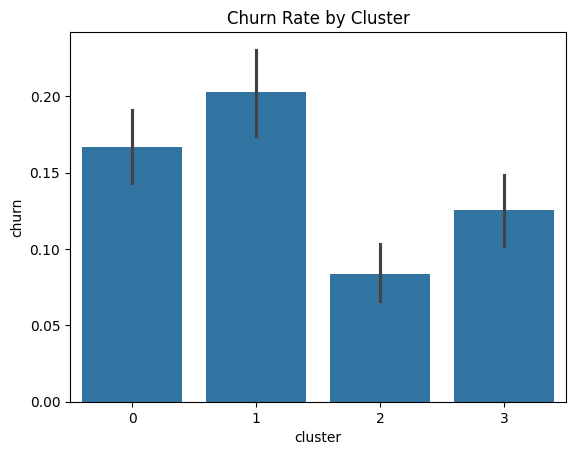

In [30]:
import seaborn as sns

sns.barplot(x='cluster', y='churn', data=df)
plt.title('Churn Rate by Cluster')
plt.show()
